# ENG4701-2 Faculty Final Year Project marks analysis
## Semester 1, 2021
Dr Daniel Duke, Department of Mechanical & Aerospace Engineering

In [18]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib notebook

In [19]:
A=np.genfromtxt("ENG4701 2022 S1 Progress Report and Final Submission Marking Progress.csv",skip_header=3,delimiter=',')
print("Data shape: "+str(A.shape))
print("Mean final ENG4701 = %g" % np.nanmean(A[:,3]))
print("Std  final ENG4701 = %g" % np.nanstd(A[:,3]))
print("")
print("Mean final ENG4702 = %g" % np.nanmean(A[:,6]))
print("Std  final ENG4702 = %g" % np.nanstd(A[:,6]))

Data shape: (795, 10)
Mean final ENG4701 = 74.3235
Std  final ENG4701 = 13.5099

Mean final ENG4702 = 73.7843
Std  final ENG4702 = 8.09224


### ENG4701 analysis

In [20]:
# Filter on non zero marks
flt=(A[:,0]>0)&(A[:,1]>0)&(A[:,2]>0)

In [21]:
# FULL STATS.
slope, intercept, r, p, se = scipy.stats.linregress( np.hstack((A[flt,0],A[flt,0])) ,\
                                                     np.hstack((A[flt,1],A[flt,2])) )

x = np.linspace(A[flt,0].min(),A[flt,0].max(),10)
y = slope*x + intercept

<IPython.core.display.Javascript object>


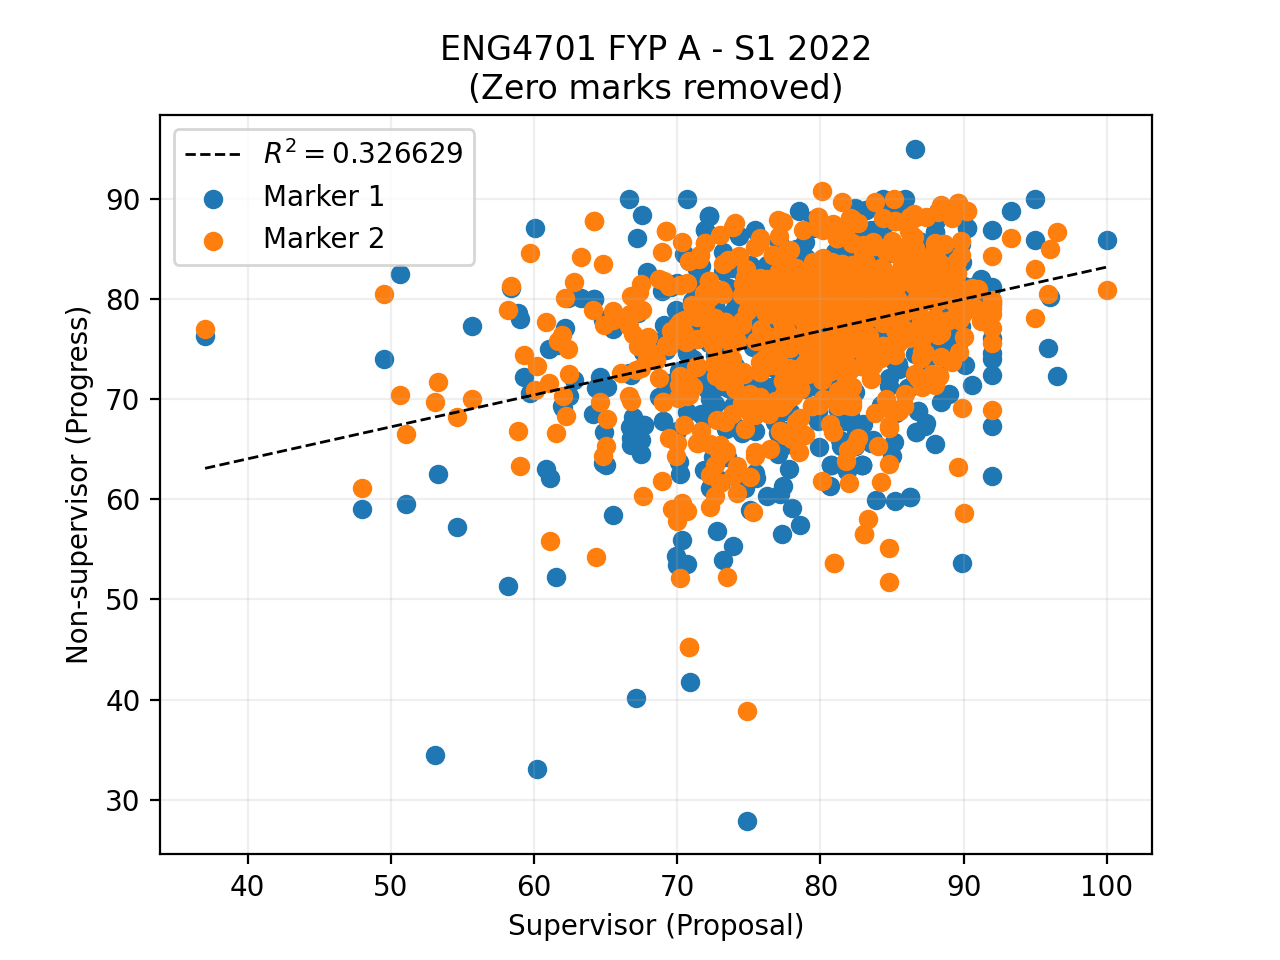

In [22]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[flt,0],A[flt,1],label='Marker 1')
ax.scatter(A[flt,0],A[flt,2],label='Marker 2')
ax.plot(x,y,ls='--',c='k',lw=1,label='$R^2 = %f$' % r)
plt.xlabel('Supervisor (Proposal)')
plt.ylabel('Non-supervisor (Progress)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4701.png")
plt.show();

In [23]:
# CROSS MARKER STATS.
fltc=(A[:,1]>0)&(A[:,2]>0)
slopec, interceptc, rc, p, se = scipy.stats.linregress( A[fltc,1],A[fltc,2] )

xc = np.linspace(A[fltc,0].min(),A[fltc,0].max(),10)
yc = slopec*xc + interceptc

<IPython.core.display.Javascript object>


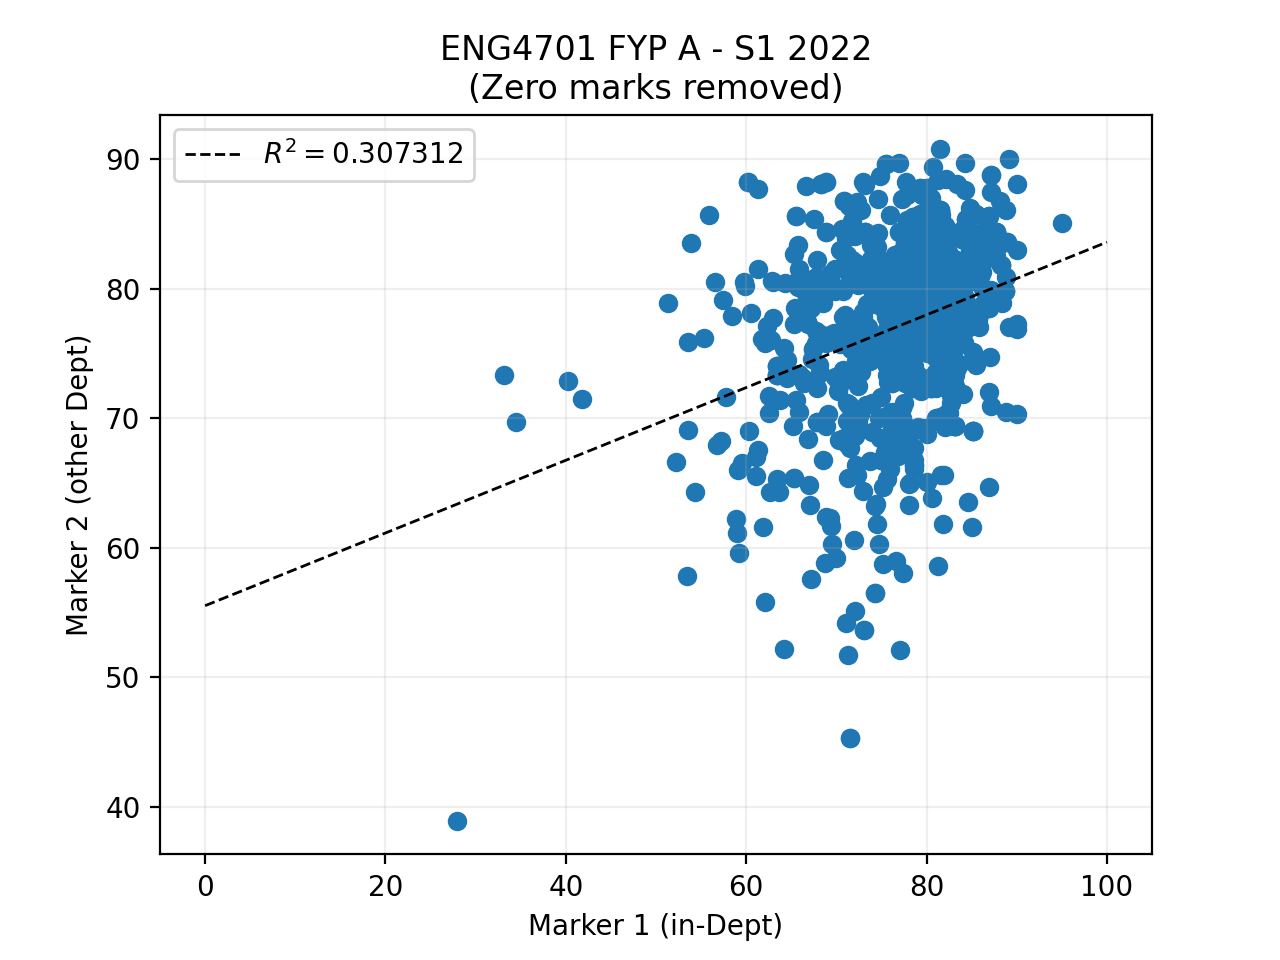

In [25]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[fltc,1],A[fltc,2])
ax.plot(xc,yc,ls='--',c='k',lw=1,label='$R^2 = %f$' % rc)
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4701b.png")
plt.show();

## ENG4702 analysis

In [15]:
# ENG4702 STATS.
flt2=(A[:,5]>0)&(A[:,6]>0)
slope, intercept, r2, p, se = scipy.stats.linregress( A[flt2,5], A[flt2,6] )
x2 = np.linspace(np.nanmin(A[flt,5]),np.nanmax(A[flt,5]),10)
y2 = slope*x + intercept

<IPython.core.display.Javascript object>


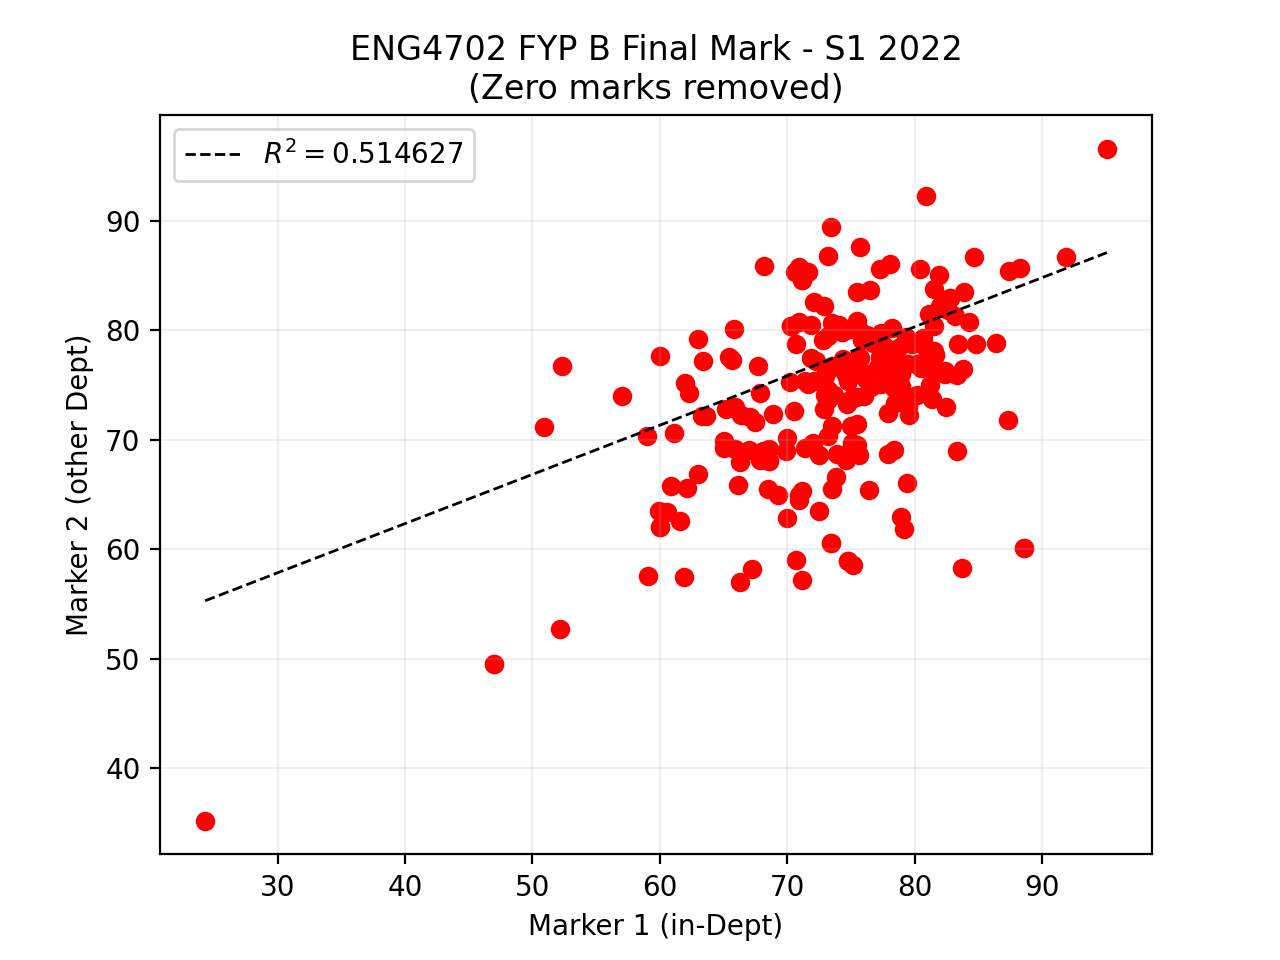

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
ax.scatter(A[flt,5],A[flt,6],label=None,c='r')
ax.plot(x2,y2,ls='--',c='k',lw=1,label='$R^2 = %f$' % r2)
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4702 FYP B Final Mark - S1 2022\n(Zero marks removed)")
plt.legend()
#plt.savefig("/Users/dduke/Desktop/ENG4702.png")
plt.show();

## Per-department analysis

<IPython.core.display.Javascript object>


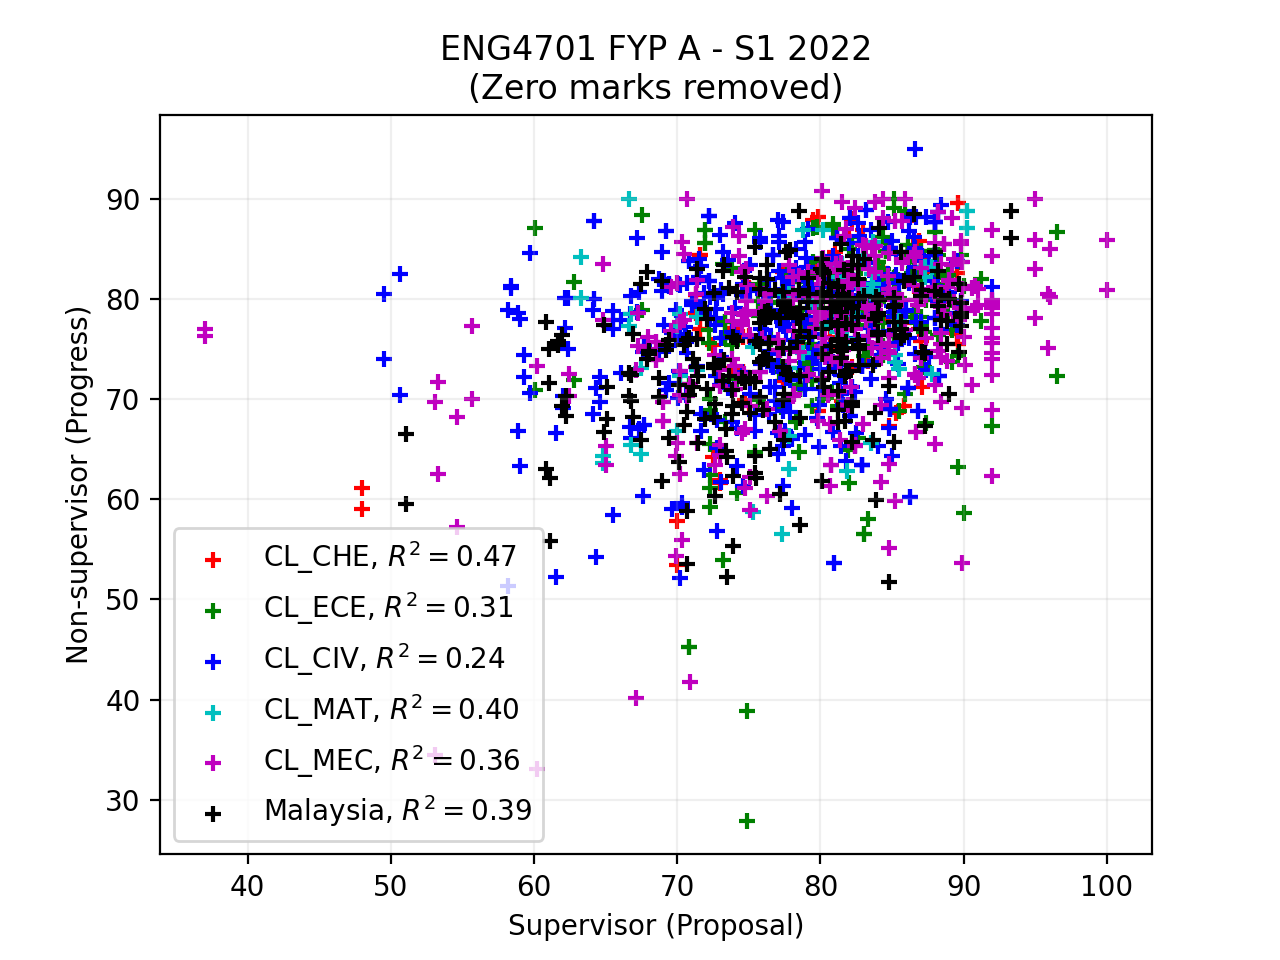

<IPython.core.display.Javascript object>


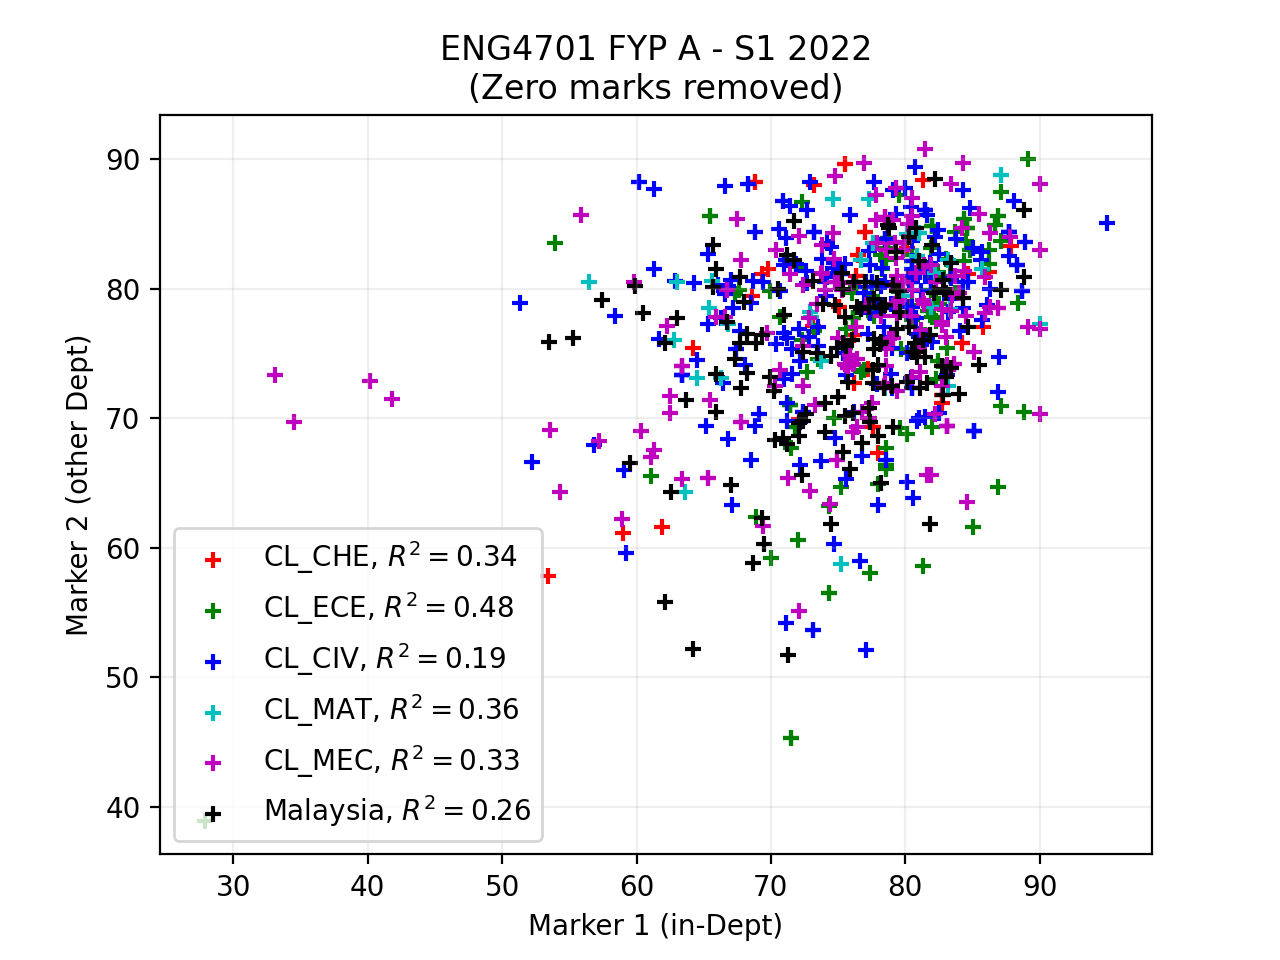

<IPython.core.display.Javascript object>


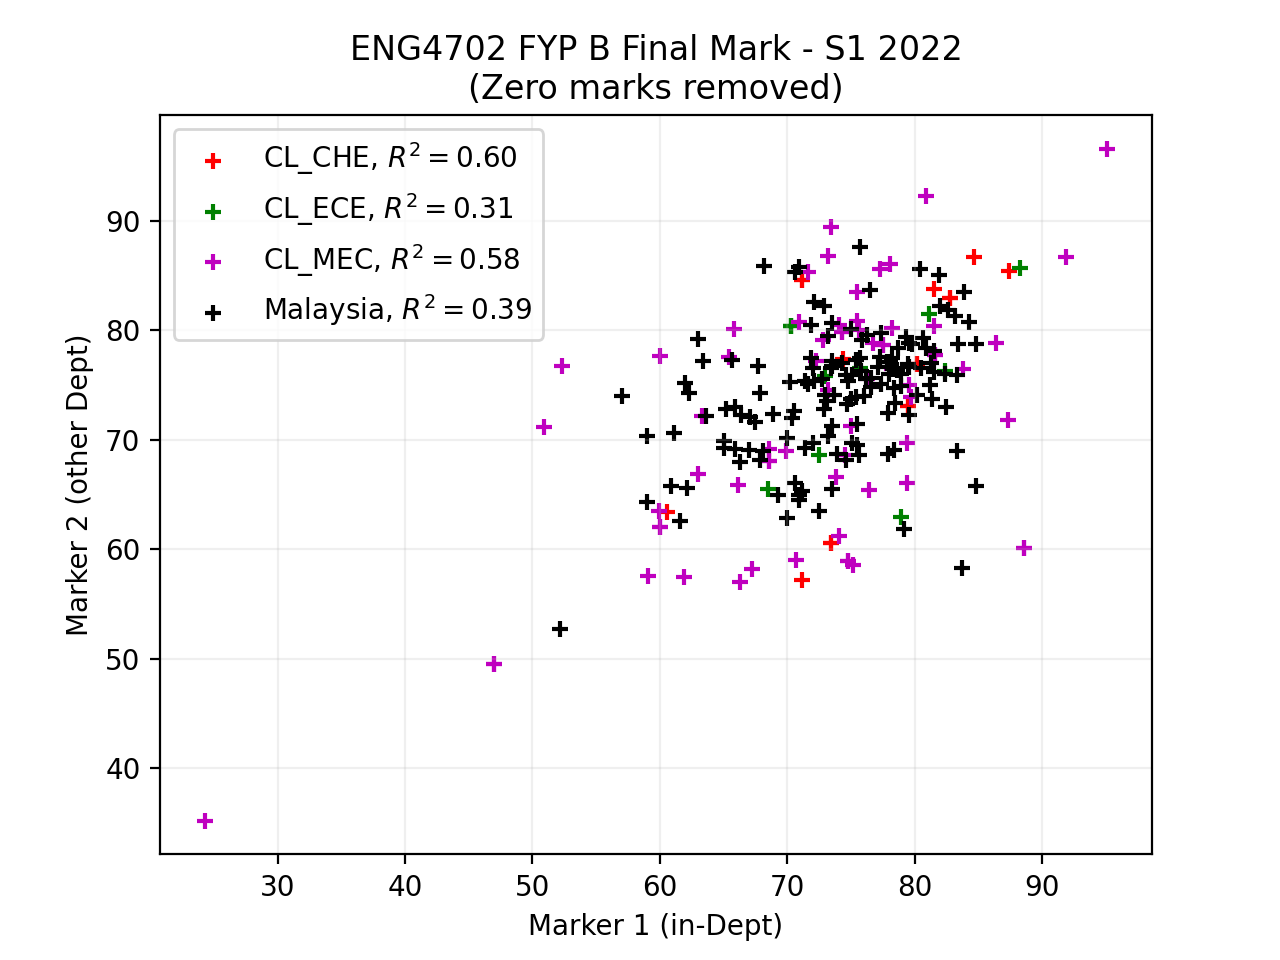

In [53]:
# 0 = CL_CHE
# 1 = CL_ECE
# 2 = CL_CIV
# 3 = CL_MAT
# 4 = CL_MEC
# 5 = MA_CHE
# 6 = MA_CIV
# 7 = MA_ECE
# 8 = MA_MEC
# 9 = MA_TRC

Depts = ['CL_CHE','CL_ECE','CL_CIV','CL_MAT','CL_MEC','Malaysia']
cList = ['r','g','b','c','m','k','y']

fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,4]==i
    else: df = A[:,4]>=5
    datax = np.hstack((A[flt&df,0],A[flt&df,0]))
    datay = np.hstack((A[flt&df,1],A[flt&df,2]))
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Supervisor (Proposal)')
plt.ylabel('Non-supervisor (Progress)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4701c.png")


fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,4]==i
    else: df = A[:,4]>=5
    datax=A[flt&df,1]
    datay=A[flt&df,2]
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4701 FYP A - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4701d.png")


fig=plt.figure()
ax=fig.add_subplot(111)
plt.grid(alpha=.2)
i=0
for D in Depts:
    if i<5: df = A[:,8]==i
    else: df = A[:,8]>=5
    datax = A[flt2&df,5]
    datay = A[flt2&df,6]
    if len(datax)>0:
        slope, intercept, r, p, se = scipy.stats.linregress(np.nan_to_num(datax),np.nan_to_num(datay))
        ax.scatter(datax,datay,label=Depts[i]+', $R^2=$%.2f' % r,c=cList[i],marker='+')
    i+=1
plt.xlabel('Marker 1 (in-Dept)')
plt.ylabel('Marker 2 (other Dept)')
plt.title("ENG4702 FYP B Final Mark - S1 2022\n(Zero marks removed)")
plt.legend()
plt.savefig("/Users/dduke/Desktop/ENG4702b.png")


plt.show();


